In [1]:
#(a)
  
?USArrests

USArrests               package:datasets               R Documentation

_V_i_o_l_e_n_t _C_r_i_m_e _R_a_t_e_s _b_y _U_S _S_t_a_t_e

_D_e_s_c_r_i_p_t_i_o_n:

     This data set contains statistics, in arrests per 100,000
     residents for assault, murder, and rape in each of the 50 US
     states in 1973.  Also given is the percent of the population
     living in urban areas.

_U_s_a_g_e:

     USArrests
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 4 variables.

       [,1]  Murder    numeric  Murder arrests (per 100,000)  
       [,2]  Assault   numeric  Assault arrests (per 100,000) 
       [,3]  UrbanPop  numeric  Percent urban population      
       [,4]  Rape      numeric  Rape arrests (per 100,000)    
      
_N_o_t_e:

     ‘USArrests’ contains the data as in McNeil's monograph.  For the
     ‘UrbanPop’ percentages, a review of the table (No. 21) in the
     Statistical Abstracts 1975 reveals a transcription error for
     Maryland (and that McNeil used the same “round to even” rule that
     R's ‘round()’ uses), as found by Daniel S Coven (Arizona).

     See the example below on how to correct the error and improve
     accuracy for the ‘<n>.5’ percentages.

_S_o_u_r_c_e:

     World Almanac and Book of facts 1975.  (Crime rates).

     Statistical Abstracts of the United States 1975, p.20, (Urban
     rates), possibly available as <URL:
     https://books.google.ch/books?id=zl9qAAAAMAAJ&pg=PA20>.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  New York:
     Wiley.

_S_e_e _A_l_s_o:

     The ‘state’ data sets.

_E_x_a_m_p_l_e_s:

     summary(USArrests)
     
     require(graphics)
     pairs(USArrests, panel = panel.smooth, main = "USArrests data")
     
     ## Difference between 'USArrests' and its correction
     USArrests["Maryland", "UrbanPop"] # 67 -- the transcription error
     UA.C <- USArrests
     UA.C["Maryland", "UrbanPop"] <- 76.6
     
     ## also +/- 0.5 to restore the original  <n>.5  percentages
     s5u <- c("Colorado", "Florida", "Mississippi", "Wyoming")
     s5d <- c("Nebraska", "Pennsylvania")
     UA.C[s5u, "UrbanPop"] <- UA.C[s5u, "UrbanPop"] + 0.5
     UA.C[s5d, "UrbanPop"] <- UA.C[s5d, "UrbanPop"] - 0.5
     
     ## ==> UA.C  is now a *C*orrected version of  USArrests

In [12]:
#(b)

dat <- as.matrix(USArrests[,c(1,2,4)])


In [ ]:
#(c)

stars(dat,draw.segments = TRUE, key.loc = c(15,1))
# Compared to the other states, there are only a few cases 
# of murder and rape and an average number of assaults in Rhode 
# Island. North Dakota is the state with the lowest number of 
# crimes overall, the lengths of all segments are 0.

In [5]:
#(d)
    
summary(dat)

# Since PC1 is in the direction of the largest variance we would 
# expect the variable Assault to get the	largest loadings for PC1.

     Murder          Assault           Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :46.00  

In [6]:
#(e)

pc <- prcomp(dat, scale=FALSE)
pc$rotation

#Yes, the variable Assault clearly gets the largest loadings for PC1. 
# Note: There is a cutoff in the princomp function which is by default 
# at 0.1. If a loading is below that cutoff, it only shows blank 
# spaces in the output.

,PC1,PC2,PC3
Murder,-0.04180743,0.02555358,0.99879886
Assault,-0.99630506,-0.07612980,-0.03975532
Rape,-0.07502247,0.99677042,-0.02864195


In [7]:
#(f) From now on we work with scaled data.

pc <- prcomp(dat, scale=TRUE)
pc$rotation
    
# PC1 is a weighted average of the three violence measures 
# (PC1=-0.583 Murder - 0.608 Assault - 0.539 Rape). States with 
# a large number of crimes have a large negative score of PC1.

,PC1,PC2,PC3
Murder,-0.5826006,0.5339532,-0.6127565
Assault,-0.6079818,0.2140236,0.7645600
Rape,-0.5393836,-0.8179779,-0.1999436


In [8]:
#(g) 
pc$rotation[,2]
   
# The states with a high PC2 score are states with a low 
# number of Rape and at the same time high number of Murder.

Murder    Assault       Rape 
 0.5339532  0.2140236 -0.8179779

In [9]:
#(h)

summary(pc)
    
# PC1 and PC2 explain approximately $94\%$ of the total variance.

Importance of components:
                          PC1    PC2     PC3
Standard deviation     1.5358 0.6768 0.42822
Proportion of Variance 0.7862 0.1527 0.06112
Cumulative Proportion  0.7862 0.9389 1.00000

[1] -3.098907e-16

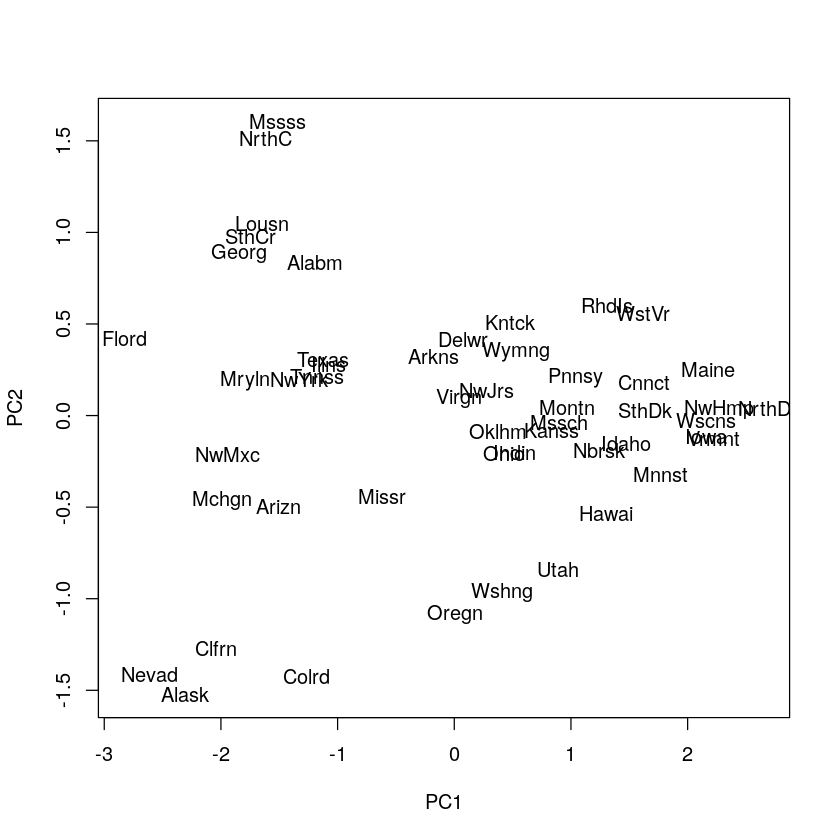

In [10]:
#(i)
   
cor(pc$x[,1], pc$x[,2]) #they are uncorrelated!
    
 
plot(pc$x[,2]~pc$x[,1], pch="", ylab="PC2", xlab="PC1")
text(pc$x[,1],pc$x[,2],abbreviate(row.names(dat),5))

In [11]:
#(j)
# As the loadings for PC1 are all negative, the most violent state according to PC1 is Florida and the least violent one North Dakota. The state with the highest PC2 score is Mississippi. The same conclusions can be drawn from the star plot: Florida's star plot has very large segments for Assault and Murder with Rape being a slightly smaller segment, North Dakota's segments aren't
# even visible, as it has the smallest values for all three variables among all states and thus, the length	of the segments is equal to zero. The segment for Murder in the star plot of Mississippi is very large compared to
# the one for Rape. States which are close together in this plot as for example Alaska, Nevada and California (i.e. have similar scores for PC1 and PC2) also look very similar in the star plot. States that are far apart have very different shapes in the star plot.